In [1]:
DATA_DIR = '../data/'
MODEL_DIR = '../models/'

In [2]:
import os

from itertools import product
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
plt.style.use('dark_background')

In [4]:
X_scaled = np.load(os.path.join(DATA_DIR, 'X_scaled.npy'))
X_pca = np.load(os.path.join(DATA_DIR, 'X_pca.npy'))

## KMeans

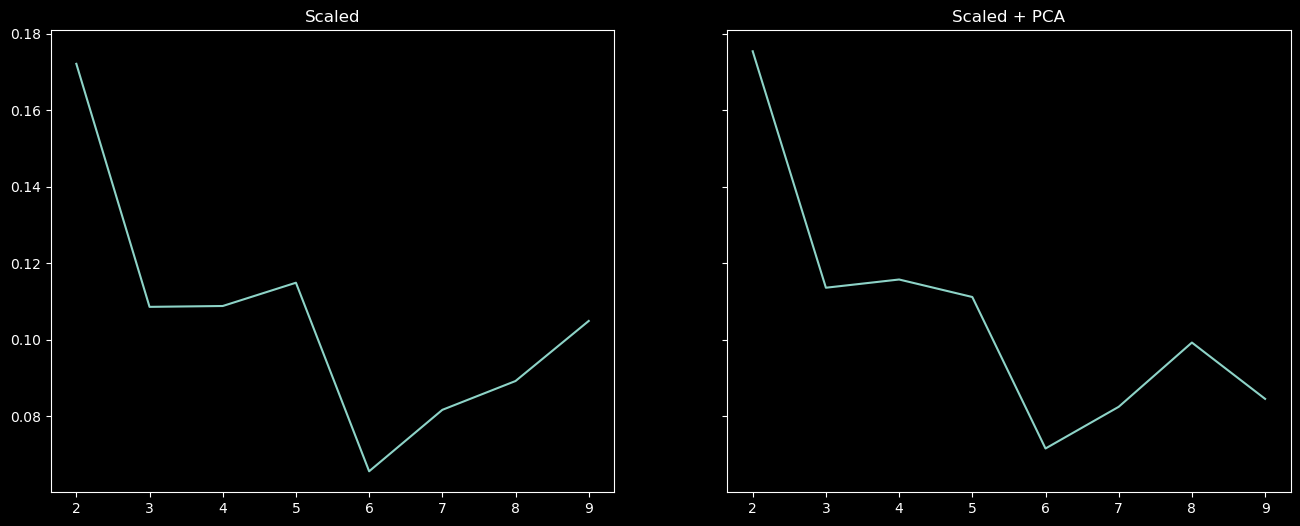

In [5]:
n_clusters_ = np.arange(2,10,1)
# params = list(product(n_clusters_))

s_scores_scaled = []
s_scores_pca = []

for n_cluster in n_clusters_:
    model = KMeans(n_clusters= n_cluster, n_init=10)
    y_pred_scaled = model.fit_predict(X_scaled)
    y_pred_pca = model.fit_predict(X_pca)
    # print(y_pred)
    s_scores_scaled.append(silhouette_score(X=X_scaled, labels=y_pred_scaled))
    s_scores_pca.append(silhouette_score(X=X_pca, labels=y_pred_pca))

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.lineplot(x=n_clusters_, y=s_scores_scaled, ax=axes[0]).set(title="Scaled")
sns.lineplot(x=n_clusters_, y=s_scores_pca, ax=axes[1]).set(title="Scaled + PCA")
plt.show()

In [6]:
np.max(s_scores_pca)

0.17539359905258758

In [7]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X_pca)
with open(os.path.join(MODEL_DIR, 'kmeans.pickle'), 'wb') as f:
    pickle.dump(kmeans, f)

# DBSCAN

In [8]:
from sklearn.neighbors import NearestNeighbors

[]

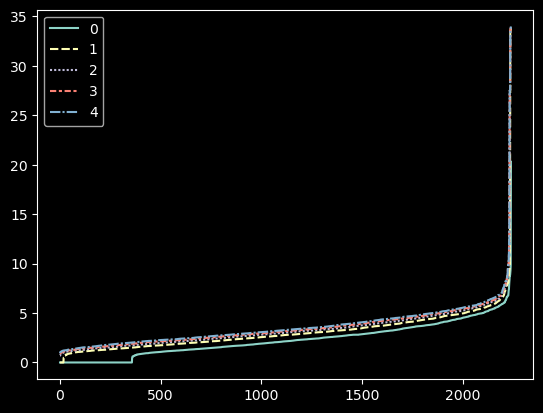

In [9]:
neighbors_ = NearestNeighbors()
neighbors_fit_ = neighbors_.fit(X_scaled)
dists, idx = neighbors_fit_.kneighbors()
dists = np.sort(dists, axis=0)
sns.lineplot(dists)
plt.plot()

In [10]:
min_samples_ = np.arange(1,6,1)
eps_ = np.arange(0.3,2,0.1)

params = list(product(min_samples_, eps_))

s_scores_scaled = []
s_scores_pca = []
n_clusters = []

for min_samples, eps in params:
    model = DBSCAN(min_samples=min_samples, eps=eps)
    y_pred_scaled = model.fit_predict(X_scaled)
    y_pred_pca = model.fit_predict(X_pca)
    # print(y_pred)
    n_clusters.append(len(np.unique(model.labels_)))
    for list_, X, pred in zip([s_scores_scaled, s_scores_pca], [X_scaled, X_pca],[y_pred_scaled, y_pred_pca]):
        try:
            list_.append(silhouette_score(X=X, labels=pred))
        except:
            list_.append(0)

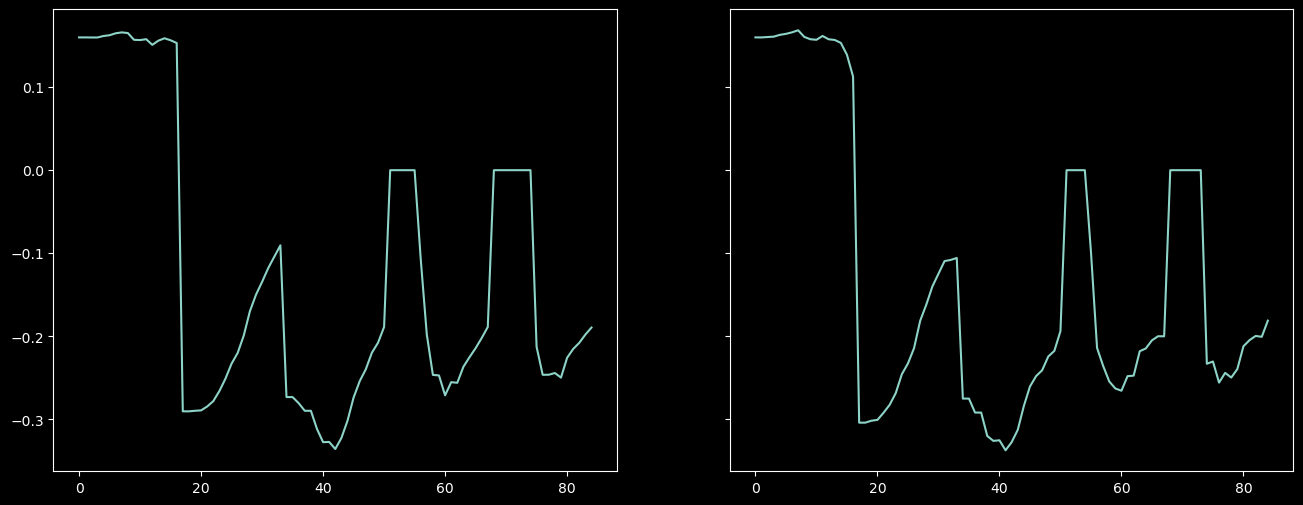

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.lineplot(s_scores_scaled, ax=axes[0])
sns.lineplot(s_scores_pca, ax=axes[1])
plt.show()

In [12]:
df_heat = pd.DataFrame.from_records(params, columns=['min_samples', 'eps'])
df_heat['silhouette_score_pca'] = s_scores_pca
df_heat['silhouette_score_scaled'] = s_scores_scaled
df_heat['n_clusters'] = n_clusters
pv1 = pd.pivot_table(df_heat, columns='min_samples', index='eps', values=['silhouette_score_pca', 'silhouette_score_scaled'],aggfunc=np.mean)
pv2 = pd.pivot_table(df_heat, columns='n_clusters', index='eps', values=['silhouette_score_pca', 'silhouette_score_scaled'],aggfunc=np.mean)

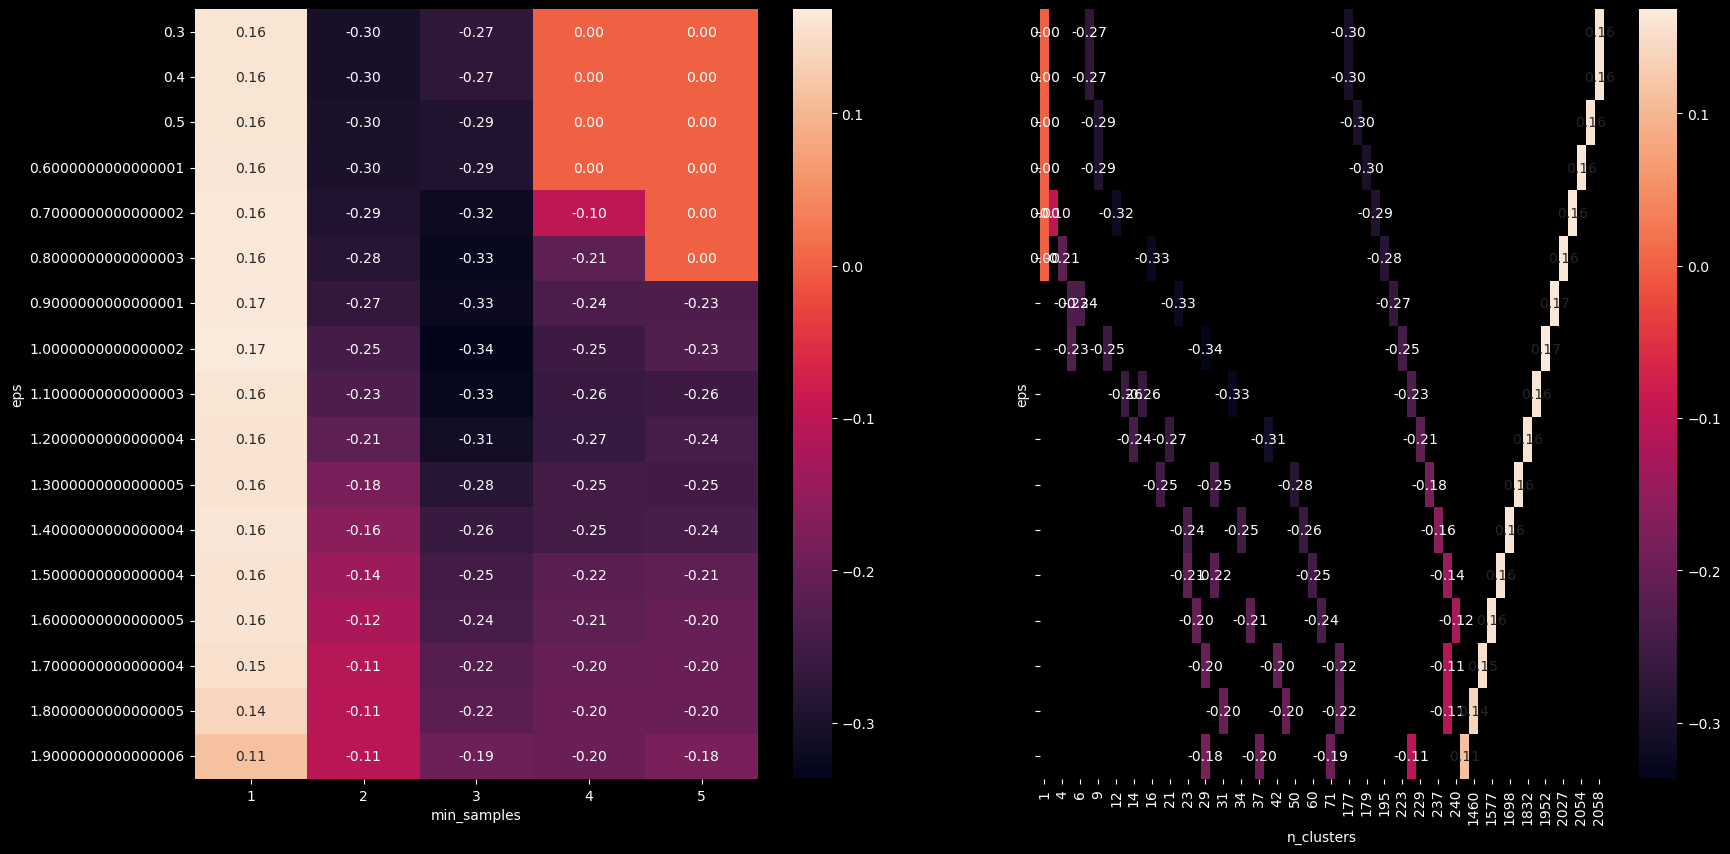

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,10))
sns.heatmap(pv1['silhouette_score_pca'], annot=True, fmt=".2f", ax=axes[0])
sns.heatmap(pv2['silhouette_score_pca'], annot=True, fmt=".2f", ax=axes[1])
plt.show()

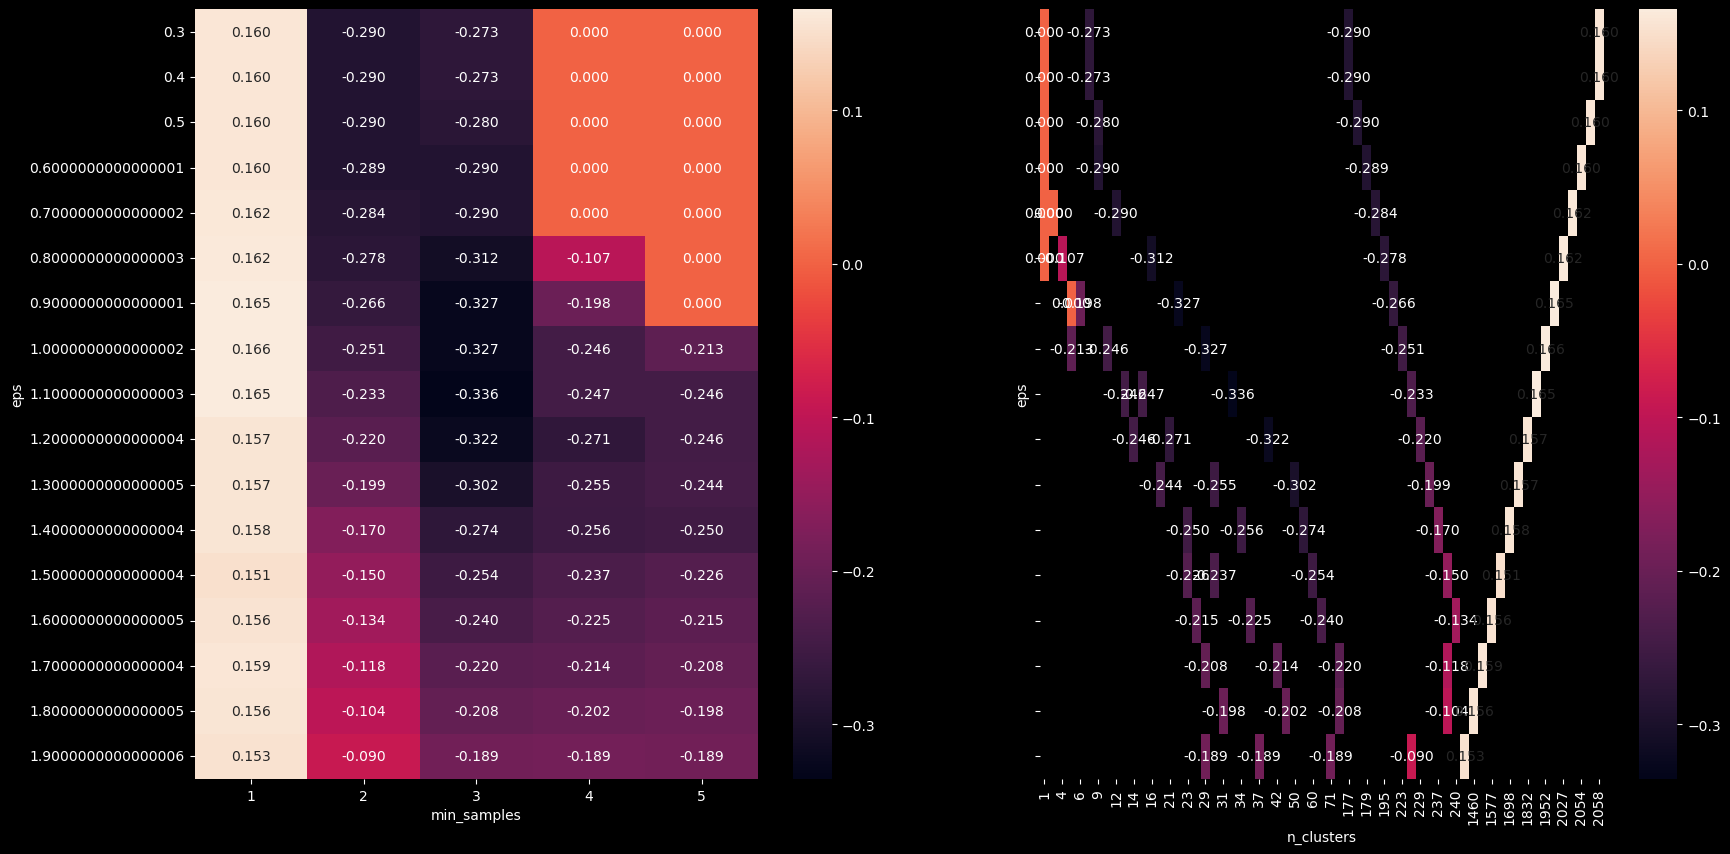

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,10))
sns.heatmap(pv1['silhouette_score_scaled'], annot=True, fmt=".3f", ax=axes[0])
sns.heatmap(pv2['silhouette_score_scaled'], annot=True, fmt=".3f", ax=axes[1])
plt.show()

In [15]:
dbscan = DBSCAN(min_samples=1, eps=1)
dbscan.fit(X_pca)
with open(os.path.join(MODEL_DIR, 'dbscan.pickle'), 'wb') as f:
    pickle.dump(dbscan, f)

## Agglomerative Hierarchical Clustering

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

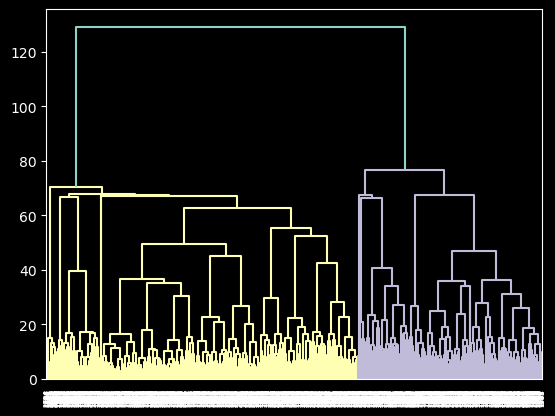

In [17]:
linkage_ = linkage(X_pca, method='ward')
dendogram_ = dendrogram(linkage_)
plt.show()

In [18]:
ahc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = ahc.fit_predict(X_pca)
print(silhouette_score(X_pca, y_pred))

with open(os.path.join(MODEL_DIR, 'ahc_ward.pickel'), 'wb') as f:
    pickle.dump(ahc, f)

0.13947786394269154


In [19]:
y_pred = ahc.fit_predict(X_scaled)
print(silhouette_score(X_scaled, y_pred))

0.13912435173615764
